In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
GL_Entries = pd.read_excel("Finance_Accounting_Starter_Kit.xlsx",sheet_name="GL_Entries")

In [10]:
Invoices = pd.read_excel("Finance_Accounting_Starter_Kit.xlsx",sheet_name="Invoices")

In [11]:
Vendor_Payments = pd.read_excel("Finance_Accounting_Starter_Kit.xlsx",sheet_name="Vendor_Payments")

In [12]:
Cashflow_Statement = pd.read_excel("Finance_Accounting_Starter_Kit.xlsx",sheet_name="Cashflow_Statement")

In [15]:
GL_Entries.head()

,Entry_ID,Account,Entry_Date,Debit,Credit
0,GL100,Rent,2023-01-01,1000,200
1,GL101,Salaries,2023-01-08,1000,1000
2,GL102,COGS,2023-01-15,200,0
3,GL103,Salaries,2023-01-22,200,1000
4,GL104,Salaries,2023-01-29,200,0


In [17]:
Invoices.head()

,Invoice_ID,Customer_Name,Invoice_Date,Due_Date,Amount,Status
0,INV1000,Omega Inc,2023-01-01,2023-01-20,2694,Paid
1,INV1001,Omega Inc,2023-01-16,2023-02-04,3355,Overdue
2,INV1002,Delta LLC,2023-01-31,2023-02-19,2418,Paid
3,INV1003,Delta LLC,2023-02-15,2023-03-06,2496,Unpaid
4,INV1004,Omega Inc,2023-03-02,2023-03-21,2747,Unpaid


In [18]:
Vendor_Payments.head()

,Payment_ID,Vendor,Payment_Date,Amount,Mode,Category
0,PAY200,Vendor A,2023-02-01,1028,Bank Transfer,Office Supplies
1,PAY201,Vendor B,2023-02-06,1551,Cheque,Maintenance
2,PAY202,Vendor C,2023-02-11,1180,UPI,Office Supplies
3,PAY203,Vendor B,2023-02-16,172,UPI,IT Services
4,PAY204,Vendor A,2023-02-21,1165,Bank Transfer,Maintenance


In [19]:
Cashflow_Statement.head()

,Month,Operating_Cashflow,Investing_Cashflow,Financing_Cashflow
0,Jan-2023,46419,2201,8278
1,Feb-2023,10722,-8981,13284
2,Mar-2023,17315,-5475,11584
3,Apr-2023,21020,7656,-8619
4,May-2023,41058,-14440,13637


In [23]:
np.info(Cashflow_Statement)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
columns : Index or arra

In [25]:
# Total Debit and Credit by Account
GL_Entries.groupby("Account")[["Debit", "Credit"]].sum()

,Debit,Credit
Account,,
COGS,2300,3900
Rent,3200,2100
Salaries,2600,2700
Sales,1700,1700
Utilities,3000,2000


In [29]:
# Clean Invoices: Convert dates, filter overdue
print(Invoices.info())
print(GL_Entries.info())
print(Vendor_Payments.info())
print(Cashflow_Statement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     20 non-null     object        
 1   Customer_Name  20 non-null     object        
 2   Invoice_Date   20 non-null     datetime64[ns]
 3   Due_Date       20 non-null     datetime64[ns]
 4   Amount         20 non-null     int64         
 5   Status         20 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Entry_ID    30 non-null     object        
 1   Account     30 non-null     object        
 2   Entry_Date  30 non-null     datetime64[ns]
 3   Debit       30 non-null     int64         
 4   Credit      30 non-nu

In [32]:
# Convert date columns to datetime objects
Invoices['Invoice_Date'] = pd.to_datetime(Invoices['Invoice_Date'])
Invoices['Due_Date'] = pd.to_datetime(Invoices['Due_Date'])
Vendor_Payments['Payment_Date'] = pd.to_datetime(Vendor_Payments['Payment_Date'])

# Handle missing values (replace with 0 for numeric, 'Unknown' for object)
for df in [GL_Entries, Invoices, Vendor_Payments, Cashflow_Statement]:
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)
        elif pd.api.types.is_object_dtype(df[col]):
            df[col] = df[col].fillna('Unknown')
        # Add handling for other data types if needed (e.g., datetime)

# Example of additional cleaning for specific columns (adjust as needed)
# Remove rows with negative amounts where they don't make sense
# Invoices['Amount'] = Invoices['Amount'].abs() # Uncomment if negative amounts are errors
# Vendor_Payments['Payment Amount'] = Vendor_Payments['Payment Amount'].abs() # Uncomment if negative amounts are errors

# Check for and handle duplicates (remove or investigate)
for df_name, df in zip(['GL_Entries', 'Invoices', 'Vendor_Payments', 'Cashflow_Statement'],
                       [GL_Entries, Invoices, Vendor_Payments, Cashflow_Statement]):
    print(f"Duplicates in {df_name}:", df.duplicated().sum())
    # df.drop_duplicates(inplace=True) # Uncomment to remove duplicates

# Recheck info after cleaning
print(Invoices.info())
print(GL_Entries.info())
print(Vendor_Payments.info())
print(Cashflow_Statement.info())

Duplicates in GL_Entries: 0
Duplicates in Invoices: 0
Duplicates in Vendor_Payments: 0
Duplicates in Cashflow_Statement: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     20 non-null     object        
 1   Customer_Name  20 non-null     object        
 2   Invoice_Date   20 non-null     datetime64[ns]
 3   Due_Date       20 non-null     datetime64[ns]
 4   Amount         20 non-null     int64         
 5   Status         20 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Entry_ID    30 non-null     object        
 1   Account     30 non-null     object        

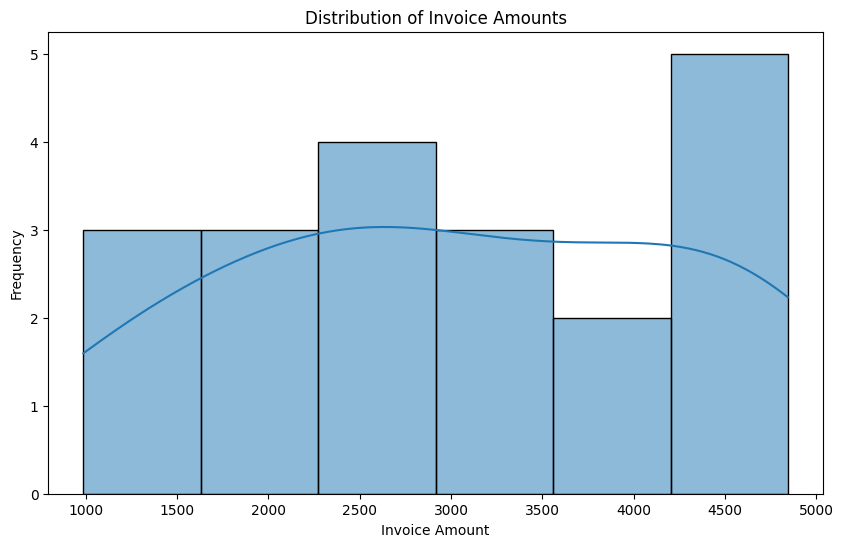

In [33]:
# 1. Invoice Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Invoices['Amount'], kde=True)
plt.title('Distribution of Invoice Amounts')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.show()


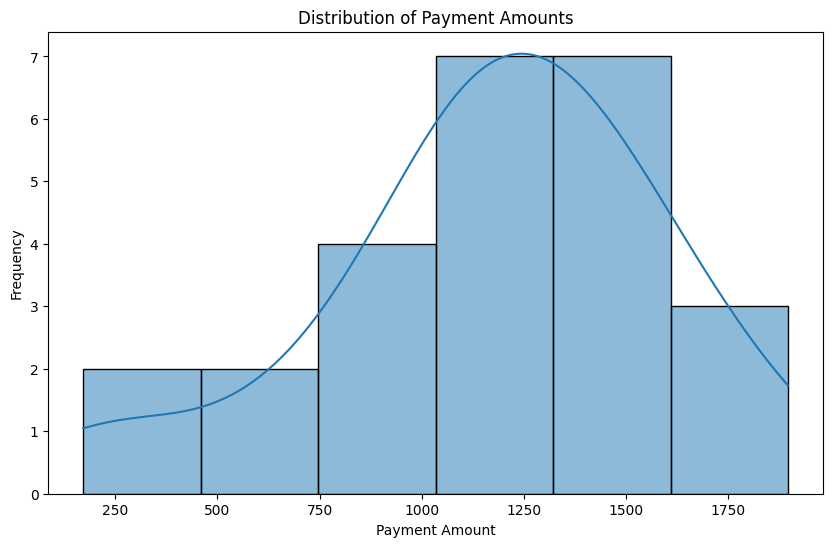

In [35]:
# 2. Payment Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Vendor_Payments['Amount'], kde=True)
plt.title('Distribution of Payment Amounts')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.show()

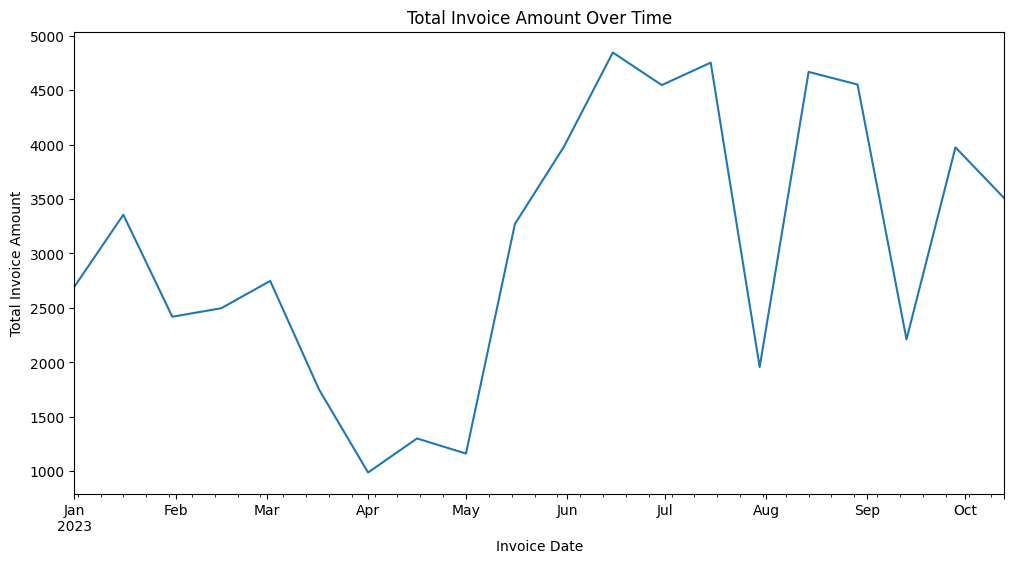

In [37]:
# 4. Time Series Analysis of Invoices
plt.figure(figsize=(12, 6))
Invoices.groupby('Invoice_Date')['Amount'].sum().plot()
plt.title('Total Invoice Amount Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Invoice Amount')
plt.show()



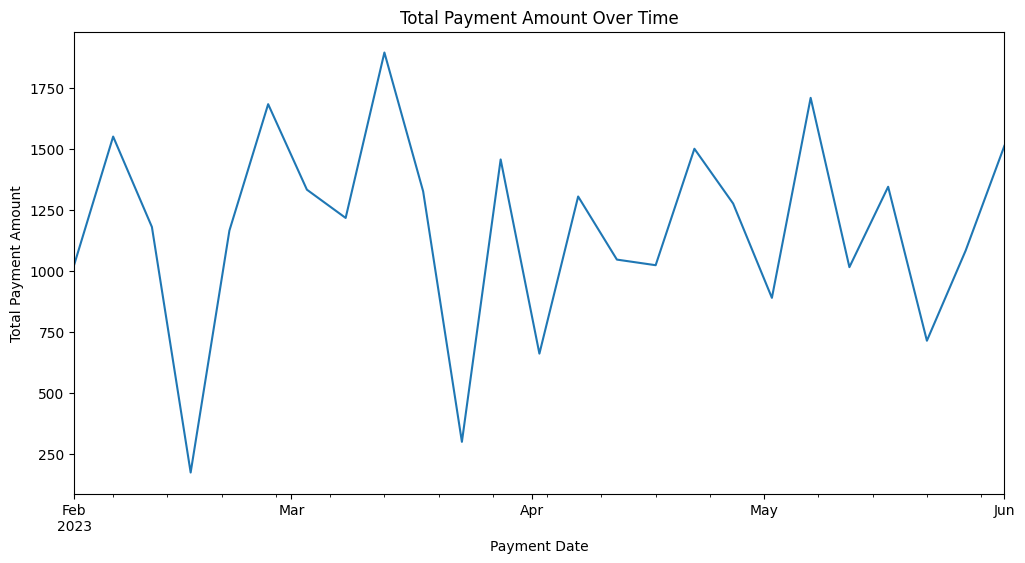

In [39]:
# 5. Time Series Analysis of Payments
plt.figure(figsize=(12, 6))
Vendor_Payments.groupby('Payment_Date')['Amount'].sum().plot()
plt.title('Total Payment Amount Over Time')
plt.xlabel('Payment Date')
plt.ylabel('Total Payment Amount')
plt.show()


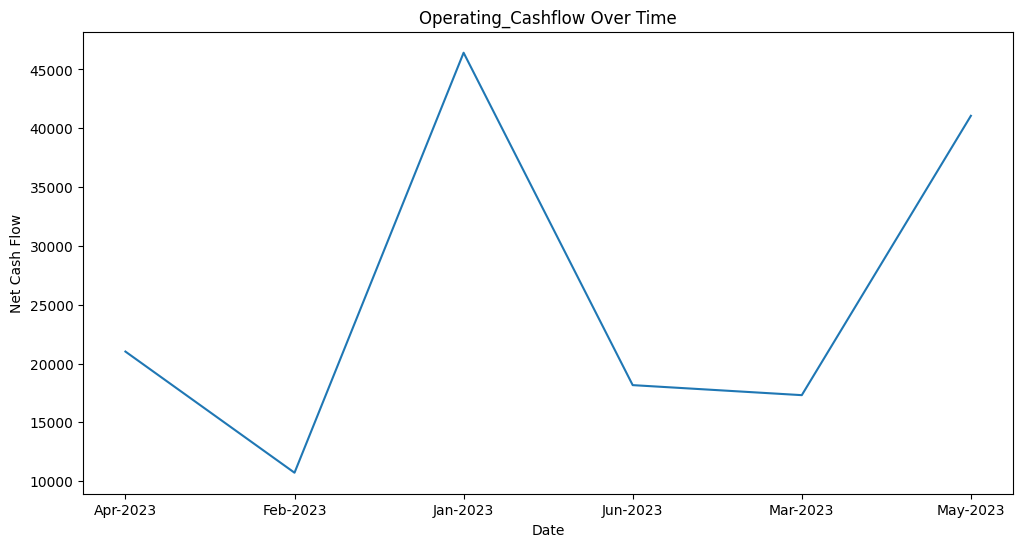

In [45]:
# 6. Cash Flow Over Time
plt.figure(figsize=(12, 6))
Cashflow_Statement.groupby('Month')['Operating_Cashflow'].sum().plot() # Assuming a 'Date' column and 'Net Cash Flow'
plt.title('Operating_Cashflow Over Time')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()


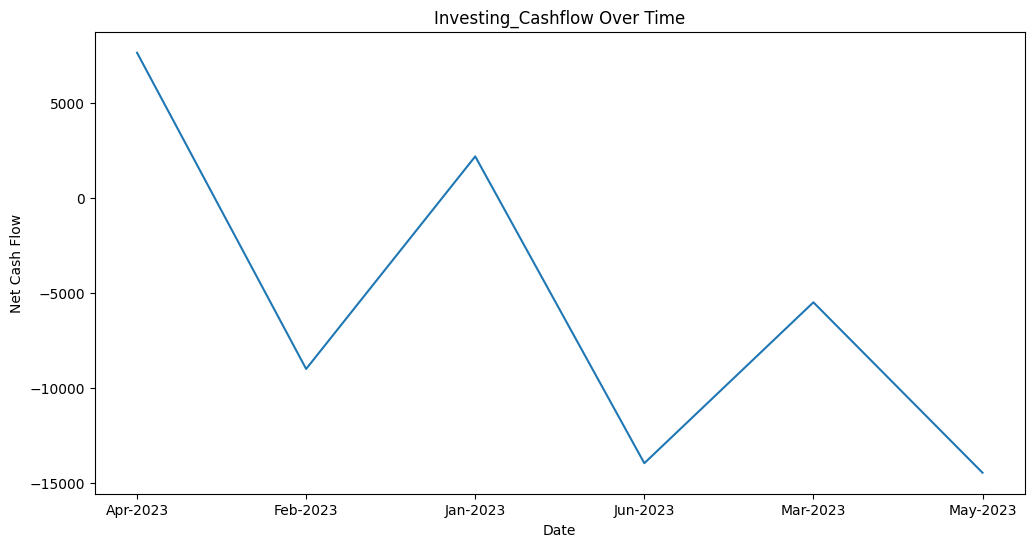

In [46]:
# 6. Cash Flow Over Time
plt.figure(figsize=(12, 6))
Cashflow_Statement.groupby('Month')['Investing_Cashflow'].sum().plot() # Assuming a 'Date' column and 'Net Cash Flow'
plt.title('Investing_Cashflow Over Time')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

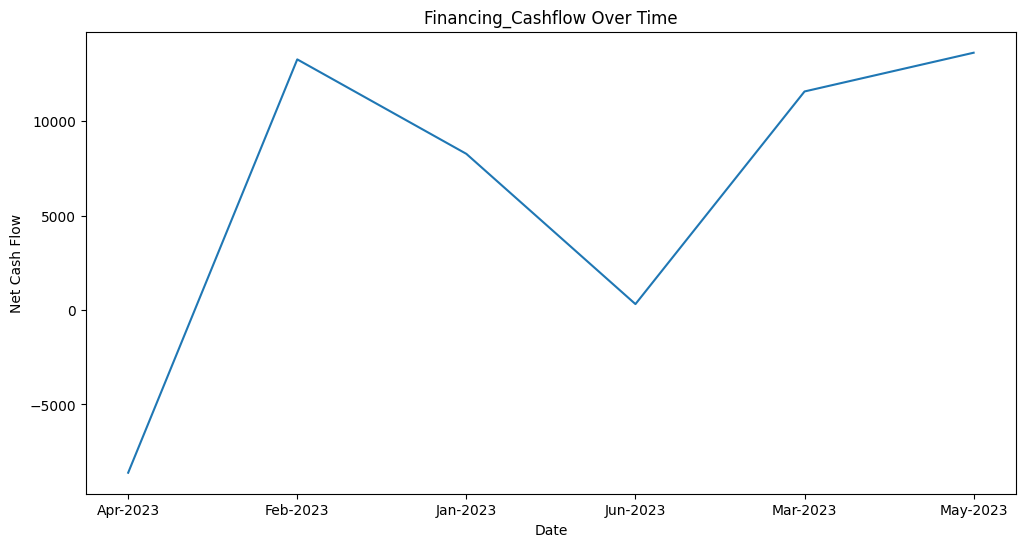

In [47]:
# 6. Cash Flow Over Time
plt.figure(figsize=(12, 6))
Cashflow_Statement.groupby('Month')['Financing_Cashflow'].sum().plot() # Assuming a 'Date' column and 'Net Cash Flow'
plt.title('Financing_Cashflow Over Time')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

In [49]:
Cashflow_Statement["Net_Cashflow"] = Cashflow_Statement["Operating_Cashflow"] + Cashflow_Statement["Investing_Cashflow"] + Cashflow_Statement["Financing_Cashflow"]

In [50]:
Cashflow_Statement.head()

,Month,Operating_Cashflow,Investing_Cashflow,Financing_Cashflow,Net_Cashflow
0,Jan-2023,46419,2201,8278,56898
1,Feb-2023,10722,-8981,13284,15025
2,Mar-2023,17315,-5475,11584,23424
3,Apr-2023,21020,7656,-8619,20057
4,May-2023,41058,-14440,13637,40255


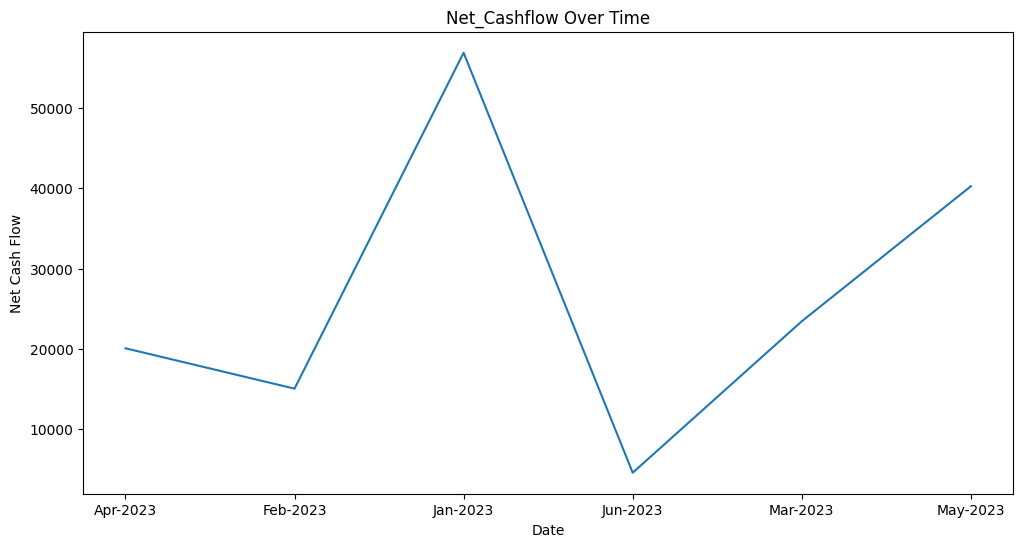

In [51]:
# 6. Cash Flow Over Time
plt.figure(figsize=(12, 6))
Cashflow_Statement.groupby('Month')['Net_Cashflow'].sum().plot() # Assuming a 'Date' column and 'Net Cash Flow'
plt.title('Net_Cashflow Over Time')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

           Debit  Credit  Balance
Account                          
COGS        2300    3900    -1600
Rent        3200    2100     1100
Salaries    2600    2700     -100
Sales       1700    1700        0
Utilities   3000    2000     1000


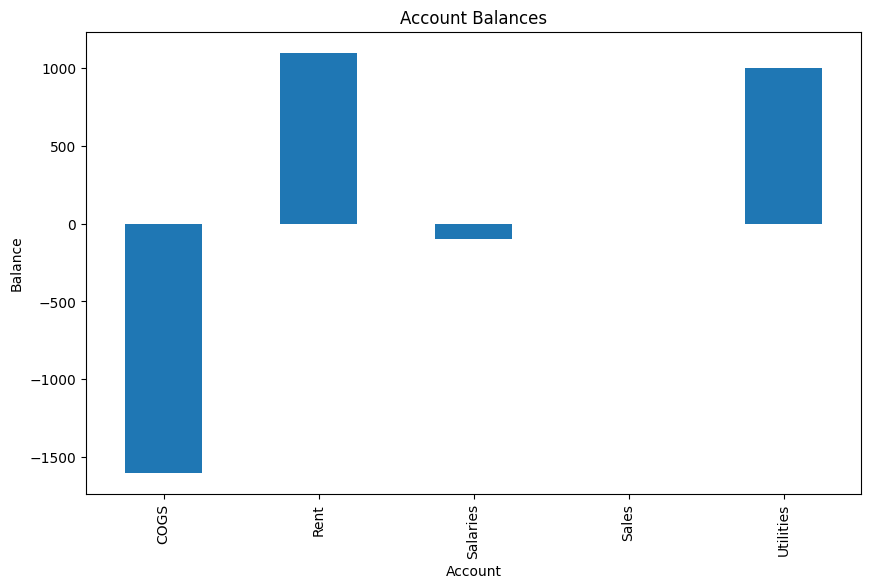

In [53]:
# 8.  Account Analysis (Debit/Credit balance)
account_summary = GL_Entries.groupby("Account")[["Debit", "Credit"]].sum()
account_summary["Balance"] = account_summary["Debit"] - account_summary["Credit"]
print(account_summary) # Add more visualizations (bar charts, etc.) as needed
plt.figure(figsize=(10,6))
account_summary["Balance"].plot(kind="bar")
plt.title("Account Balances")
plt.xlabel("Account")
plt.ylabel("Balance")
plt.show()



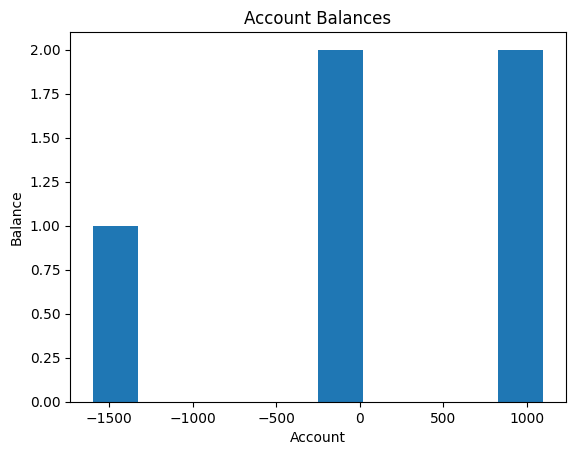

In [54]:
account_summary["Balance"].plot(kind="hist")
plt.title("Account Balances")
plt.xlabel("Account")
plt.ylabel("Balance")
plt.show()

In [61]:
GL_Entries["Balance"] = GL_Entries["Debit"] - GL_Entries["Credit"]

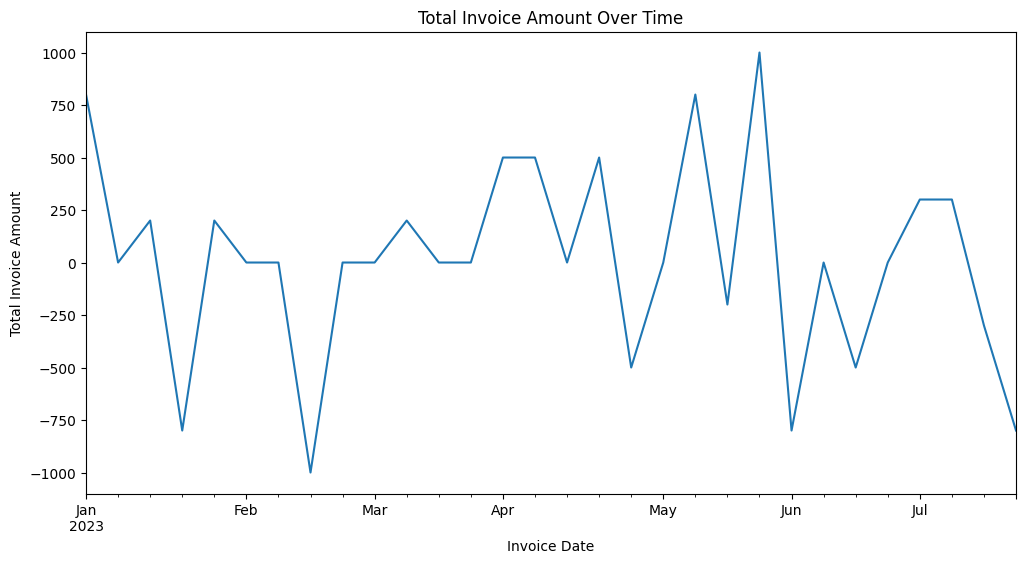

In [62]:
plt.figure(figsize=(12, 6))
GL_Entries.groupby('Entry_Date')['Balance'].sum().plot()
plt.title('Total Invoice Amount Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Invoice Amount')
plt.show()